Download the repo from here https://github.com/kriegeskorte-lab/PNAS_2020_Controversial_Stimuli
and move the PNAS_2020_Controversial_Stimuli-master folder to 
./PNAS_2020_Controversial_Stimuli-master

### preprocess the images to store them and the image names 

In [8]:

# preprocess the images to store them and the image names 

import numpy as np
import glob
from sklearn.utils import shuffle
from PIL import Image, ImageOps
import torch
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

ex_folder = './PNAS_2020_Controversial_Stimuli-master/experiment_1_results/' 
img_folder = ex_folder + 'stimuli_presented_in_behavioral_experiment/'

def load_images(img_folder, img_format):
    img_paths = glob.glob(img_folder + "/*." + img_format)
    imgs = []
    for path in img_paths:
        img = ImageOps.grayscale(Image.open(path)) #  cv2.imread(path, 0)
        imgs.append( (np.array(img) / 255.0) )   # or 1 -
    return np.array(imgs), img_paths


imgs, img_paths = load_images(img_folder, img_format="png")

img_names = []
for i in range(len(imgs)):
    img_name = img_paths[i].split('\\')[1].split('.')[0]
    img_names.append(img_name)


tensor_test_ims = torch.unsqueeze(torch.Tensor(imgs), 1)


save_dir = './data/' + 'mnist_controversial/'

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

torch.save((tensor_test_ims), save_dir + 'mnist_controversial.pt')
np.save(save_dir + 'controversial_stimuli_names.npy', img_names)

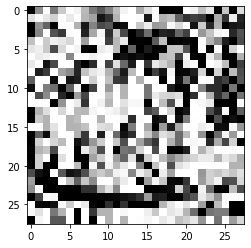

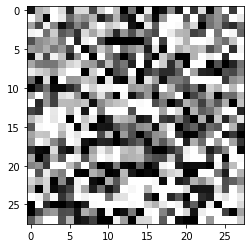

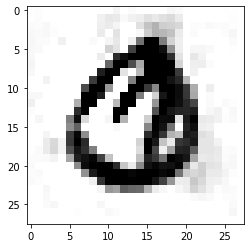

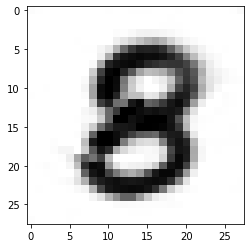

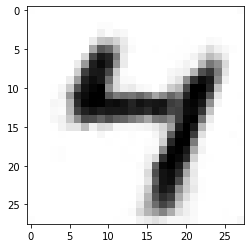

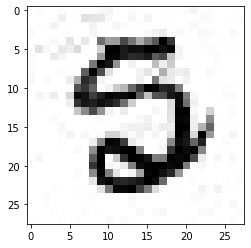

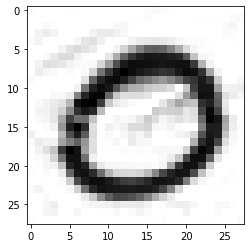

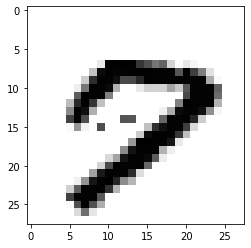

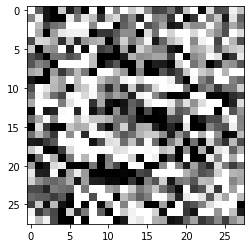

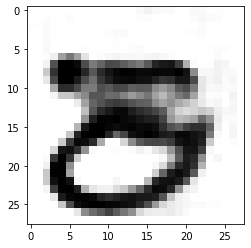

In [9]:
# examine some images 
%matplotlib inline 
import matplotlib.pyplot as plt

import pandas as pd

data_csv = ex_folder + 'Experiment_1_human_responses.csv'
df = pd.read_csv(data_csv)

img_format=".png"
for i in range(0, 100, 10):
    path = img_folder + df.image.iloc[i] + img_format
    im = Image.open(path)

    plt.imshow(im, cmap='gray')
    plt.show()

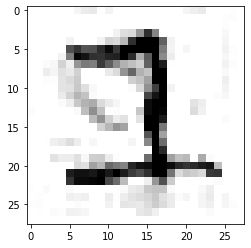

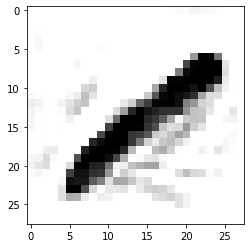

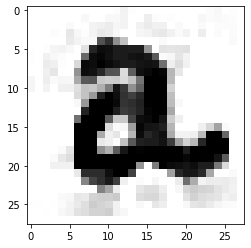

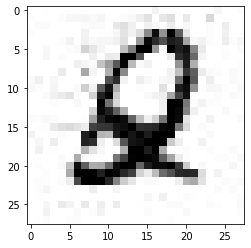

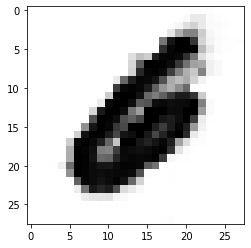

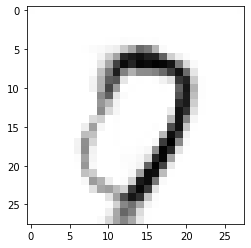

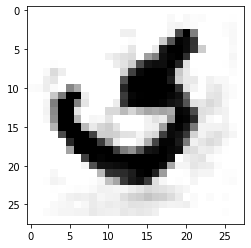

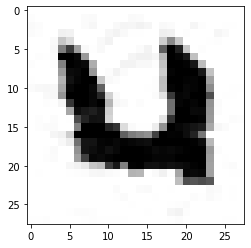

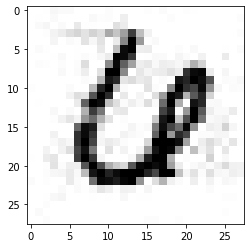

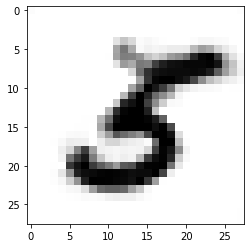

In [10]:
for i in range(0, 100, 10):
    plt.imshow(tensor_test_ims[i][0], cmap='gray')
    plt.show()